In [0]:
import pandas as pd
import numpy as np

# Task:01

In [68]:
df=pd.read_csv('time_series_covid_19_confirmed.csv')
df=df.loc[:,:'5/27/20']    #till 27 May
df.drop(['Lat','Long'],axis=1,inplace=True)
df=df.groupby(['Country/Region']).sum()
print(df.shape)

df.head()

(188, 127)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71


# Task:02

In [69]:
pakistan_row=df[df.index=='Pakistan']
pakistan_row=pakistan_row[pakistan_row>0]
pakistan_row.dropna(axis='columns', inplace=True) 
pakColumnCount=len(pakistan_row.columns)
print("column counts are: ", pakColumnCount)
pakistan_row

column counts are:  92


,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,2,2,2,4,4,4,5,5,5,6,6,6,6,16,19,20,28,31,53,136,236,299,454,501,730,776,875,972,1063,1201,1373,1495,1597,1717,1938,2118,2421,2686,2818,3157,...,7638,8348,8418,9565,10076,11155,11940,12723,13328,13915,14612,15525,16817,18114,19103,20084,20941,22049,24073,24644,26435,28736,30334,32081,34336,35298,35788,38799,38799,40151,42125,43966,45898,48091,50694,52437,54601,56349,57705,59151


In [70]:
#this Block replace tha zero values to NULL and shifts it to right so we can remove those columns 
#and compare one by one from day1 of every country with day1 of pakistan and so on.
#removing the rows with null values too since we want to compare with countries that has more or equal number of day span with pakistan

def squeeze_nan(x):
  original_columns = x.index.tolist()

  squeezed = x.dropna()
  squeezed.index = [original_columns[n] for n in range(squeezed.count())]

  return squeezed.reindex(original_columns, fill_value=np.nan)


df=df.replace(0,np.nan)
df=df.apply(squeeze_nan, axis=1)
df=df.iloc[:,:pakColumnCount]
df=df.dropna()

df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,7.0,7.0,7.0,11.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0,94.0,110.0,110.0,120.0,170.0,174.0,237.0,273.0,281.0,...,840.0,906.0,933.0,996.0,1026.0,1092.0,1176.0,1279.0,1351.0,1463.0,1531.0,1703.0,1828.0,1939.0,2171.0,2335.0,2469.0,2704.0,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0,5226.0,5639.0,6053.0,6402.0,6664.0,7072.0,7653.0,8145.0,8676.0,9216.0,9998.0,10582.0,11173.0
Algeria,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,12.0,12.0,17.0,17.0,19.0,20.0,20.0,20.0,24.0,26.0,37.0,48.0,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,...,2418.0,2534.0,2629.0,2718.0,2811.0,2910.0,3007.0,3127.0,3256.0,3382.0,3517.0,3649.0,3848.0,4006.0,4154.0,4295.0,4474.0,4648.0,4838.0,4997.0,5182.0,5369.0,5558.0,5723.0,5891.0,6067.0,6253.0,6442.0,6629.0,6821.0,7019.0,7201.0,7377.0,7542.0,7728.0,7918.0,8113.0,8306.0,8503.0,8697.0
Australia,4.0,5.0,5.0,6.0,9.0,9.0,12.0,12.0,12.0,13.0,13.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,25.0,27.0,30.0,39.0,52.0,55.0,...,568.0,681.0,791.0,1071.0,1549.0,1682.0,2044.0,2364.0,2810.0,3143.0,3640.0,3984.0,4361.0,4559.0,4862.0,5116.0,5330.0,5550.0,5687.0,5797.0,5895.0,6010.0,6108.0,6215.0,6303.0,6315.0,6351.0,6415.0,6440.0,6462.0,6522.0,6568.0,6610.0,6623.0,6645.0,6652.0,6662.0,6677.0,6694.0,6714.0
Austria,2.0,2.0,3.0,3.0,9.0,14.0,18.0,21.0,29.0,41.0,55.0,79.0,104.0,131.0,182.0,246.0,302.0,504.0,655.0,860.0,1018.0,1332.0,1646.0,2013.0,2388.0,2814.0,3582.0,4474.0,5283.0,5588.0,6909.0,7657.0,8271.0,8788.0,9618.0,10180.0,10711.0,11129.0,11524.0,11781.0,...,14595.0,14671.0,14749.0,14795.0,14873.0,14925.0,15002.0,15071.0,15148.0,15225.0,15274.0,15357.0,15402.0,15452.0,15531.0,15558.0,15597.0,15621.0,15650.0,15684.0,15752.0,15774.0,15833.0,15871.0,15882.0,15961.0,15997.0,16058.0,16109.0,16201.0,16242.0,16269.0,16321.0,16353.0,16404.0,16436.0,16486.0,16503.0,16539.0,16557.0
Bahrain,1.0,23.0,33.0,33.0,36.0,41.0,47.0,49.0,49.0,52.0,55.0,60.0,85.0,85.0,95.0,110.0,195.0,195.0,195.0,210.0,214.0,214.0,228.0,256.0,278.0,285.0,305.0,334.0,377.0,392.0,419.0,458.0,466.0,476.0,499.0,515.0,567.0,569.0,643.0,672.0,...,1700.0,1740.0,1773.0,1881.0,1907.0,1973.0,2027.0,2217.0,2518.0,2588.0,2647.0,2723.0,2811.0,2921.0,3040.0,3170.0,3284.0,3383.0,3533.0,3720.0,3934.0,4199.0,4444.0,4774.0,4941.0,5236.0,5531.0,5816.0,6198.0,6583.0,6747.0,6956.0,7184.0,7532.0,7888.0,8174.0,8414.0,8802.0,9138.0,9171.0
Belgium,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0,13.0,23.0,50.0,109.0,169.0,200.0,239.0,267.0,314.0,314.0,559.0,689.0,...,7284.0,9134.0,10836.0,11899.0,12775.0,13964.0,15348.0,16770.0,18431.0,19691.0,20814.0,22194.0,23403.0,24983.0,26667.0,28018.0,29647.0,30589.0,31119.0,33573.0,34809.0,36138.0,37183.0,38496.0,39983.0,40956.0,41889.0,42797.0,44293.0,45325.0,46134.0,46687.0,47334.0,47859.0,48519.0,49032.0,49517.0,49906.0,50267.0,50509.0
Brazil,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,4.0,13.0,13.0,20.0,25.0,31.0,38.0,52.0,151.0,151.0,162.0,200.0,321.0,372.0,621.0,793.0,1021.0,1546.0,1924.0,2247.0,2554.0,2985.0,3417.0,3904.0,4256.0,4579.0,5717.0

# Top 5 countries with same trends

In [71]:
#top related 5 countries with PAK

df_compare=abs(np.subtract(df,pakistan_row))

df['trend relation score with PAK'] = df_compare.sum(axis=1)
df=df.nsmallest(6,['trend relation score with PAK'])
df=df.iloc[:,:-1]

print('top 5 trend related countries with pakistan:\n\n ',df.index.values[1:]) 
df.columns=pakistan_row.columns.values
df

top 5 trend related countries with pakistan:

  ['Belgium' 'Canada' 'Romania' 'Israel' 'Russia']


,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,2.0,2.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,16.0,19.0,20.0,28.0,31.0,53.0,136.0,236.0,299.0,454.0,501.0,730.0,776.0,875.0,972.0,1063.0,1201.0,1373.0,1495.0,1597.0,1717.0,1938.0,2118.0,2421.0,2686.0,2818.0,3157.0,...,7638.0,8348.0,8418.0,9565.0,10076.0,11155.0,11940.0,12723.0,13328.0,13915.0,14612.0,15525.0,16817.0,18114.0,19103.0,20084.0,20941.0,22049.0,24073.0,24644.0,26435.0,28736.0,30334.0,32081.0,34336.0,35298.0,35788.0,38799.0,38799.0,40151.0,42125.0,43966.0,45898.0,48091.0,50694.0,52437.0,54601.0,56349.0,57705.0,59151.0
Belgium,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0,13.0,23.0,50.0,109.0,169.0,200.0,239.0,267.0,314.0,314.0,559.0,689.0,...,7284.0,9134.0,10836.0,11899.0,12775.0,13964.0,15348.0,16770.0,18431.0,19691.0,20814.0,22194.0,23403.0,24983.0,26667.0,28018.0,29647.0,30589.0,31119.0,33573.0,34809.0,36138.0,37183.0,38496.0,39983.0,40956.0,41889.0,42797.0,44293.0,45325.0,46134.0,46687.0,47334.0,47859.0,48519.0,49032.0,49517.0,49906.0,50267.0,50509.0
Canada,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,10.0,11.0,11.0,13.0,14.0,20.0,24.0,27.0,30.0,33.0,37.0,...,657.0,800.0,943.0,1277.0,1469.0,2088.0,2790.0,3251.0,4042.0,4682.0,5576.0,6280.0,7398.0,8527.0,9560.0,11284.0,12437.0,12978.0,15756.0,16563.0,17872.0,19141.0,20654.0,22059.0,23316.0,24299.0,25680.0,27035.0,28209.0,30809.0,32814.0,34356.0,35633.0,37658.0,39402.0,41663.0,43299.0,44919.0,46371.0,48033.0
Romania,1.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,6.0,9.0,9.0,15.0,15.0,25.0,45.0,49.0,89.0,123.0,131.0,158.0,184.0,260.0,277.0,308.0,367.0,433.0,576.0,794.0,906.0,1029.0,1292.0,1452.0,1815.0,2109.0,2245.0,2460.0,2738.0,3183.0,3613.0,3864.0,...,8418.0,8746.0,8936.0,9242.0,9710.0,10096.0,10417.0,10635.0,11036.0,11339.0,11616.0,11978.0,12240.0,12567.0,12732.0,13163.0,13512.0,13837.0,14107.0,14499.0,14811.0,15131.0,15362.0,15588.0,15778.0,16002.0,16247.0,16437.0,16704.0,16871.0,17036.0,17191.0,17387.0,17585.0,17712.0,17857.0,18070.0,18283.0,18429.0,18594.0
Israel,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,7.0,10.0,10.0,12.0,15.0,20.0,37.0,43.0,61.0,61.0,75.0,79.0,100.0,126.0,155.0,213.0,218.0,250.0,304.0,427.0,529.0,712.0,883.0,1071.0,1238.0,2369.0,2693.0,3035.0,3619.0,4247.0,4695.0,5358.0,...,11586.0,12046.0,12501.0,12758.0,12982.0,13265.0,13491.0,13713.0,13942.0,14498.0,14803.0,15058.0,15298.0,15443.0,15555.0,15728.0,15834.0,15946.0,16101.0,16185.0,16208.0,16246.0,16289.0,16310.0,16381.0,16436.0,16454.0,16477.0,16506.0,16529.0,16548.0,16579.0,16589.0,16608.0,16617.0,16643.0,16659.0,16667.0,16683.0,16690.0
Russia,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,13.0,13.0,17.0,17.0,20.0,...,438.0,495.0,658.0,840.0,1036.0,1264.0,1534.0,1836.0,2337.0,2777.0,3548.0,4149.0,4731.0,5389.0,6343.0,7497.0,8672.0,10131.0,11917.0,13584.0,15770.0,18328.0,21102.0,24490.0,27938.0,32008.0,36793.0,42853.0,47121.0,52763.0,57999.0,62773.0,68622.0,74588.0,80949.0,87147.0,93558.0,99399.0,106498.0,114431.0


In [72]:
df=df.T
df.head()

Country/Region,Pakistan,Belgium,Canada,Romania,Israel,Russia
2/26/20,2.0,1.0,1.0,1.0,1.0,2.0
2/27/20,2.0,1.0,1.0,1.0,1.0,2.0
2/28/20,2.0,1.0,2.0,3.0,1.0,2.0
2/29/20,4.0,1.0,2.0,3.0,1.0,2.0
3/1/20,4.0,1.0,2.0,3.0,1.0,2.0


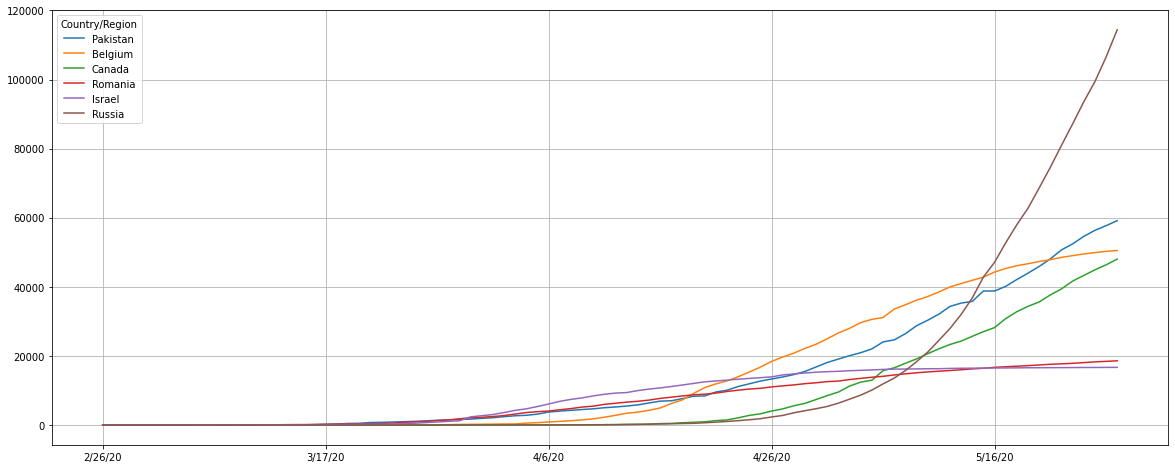

In [73]:

df.plot(figsize=(20,8),grid=True)


# Task:03

# Modelling 

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
#fixing train size till 10 may
dates = list(df.index)
train_size = dates.index('5/10/20')-dates.index('2/26/20')


In [0]:
#function which subtract successive number of patients to get patient data of each day separately
def getDiffArray(arr):
  newArr=[arr[0]]
  for i in range(len(arr)-1):
    newArr.append( arr[i+1] - arr[i])
    
  return np.array(newArr)


In [0]:
# normalize the dataset
def transform(scaler,dataset):
  #scaler = MinMaxScaler(feature_range=(0, 1))
  return scaler.fit_transform(dataset.reshape(-1, 1))

In [0]:
#inverse transforms an already transformed data using MinMaxScaler
def inverseTransform(scaler, dataset):
    return scaler.inverse_transform(dataset).reshape(1, dataset.shape[0])[0]

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [0]:
#Recurrent Neural Network
class RNN(nn.Module):

  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    
    super(RNN, self).__init__()

    self.hidden_dim = hidden_dim
    self.layer_dim = layer_dim
    self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):

    h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
    out, hn = self.rnn(x, h0)
    out = self.fc(out[:, -1, :])
    
    return out


In [0]:
#This function takes input the necessary parameters to train the network and then trains it for the given number of epochs
def trainModel(model, x, y, epochs, optimizer, error):
    
    model.train()
    
    loss = 0
    
    for epoch in range(epochs):
        
        optimizer.zero_grad()
        out = model(x)
        loss = error(out, y)
        loss.backward()
        optimizer.step()

        if epoch % 400 == 0:
            print('Epoch:', epoch, 'Loss:', loss.data)
    
    print('Epoch:', epochs, 'Loss:', loss.data)

In [0]:
#function to predict output for training data
def predict(model, x):
    model.eval()
    preds = model(x).detach().numpy()
    return preds

In [0]:
#function to predict output of future by using last prediction on validation set 
def predictFuture(model, data, future_days):
    
    preds = []
    
    for i in range(future_days):
        
        x = Variable(torch.Tensor(data))
        p = model(x).detach().numpy()[0][0]
        preds.append(p)
        tempList = list(data[0].reshape(1, look_back)[0])
        tempList.append(p)
        tempList = tempList[1:]
        data = np.array([[[i] for i in tempList]])
    
    preds = np.array([[i] for i in preds])
    
    return preds

In [0]:
#Data preprocesing
def preprocess(diffList, scaler):
    
    normalized = transform(scaler, diffList)
    
    x, y = create_dataset(normalized, look_back)
    
    x_train, y_train = x[:train_size], y[:train_size]
    
    x_vld = x[train_size-look_back:]
    
    last = x[-1]
    #print("last value: ", last)
    
    x_train = Variable(torch.Tensor(x_train))
    
    x_vld = Variable(torch.Tensor(x_vld))
    
    y_train = Variable(torch.Tensor(y_train)).view(-1, 1)
    
    return x_train, y_train, x_vld, last

In [0]:
#Returns an RNN model , optim, error
def getModel(in_dim, hidden_dim, layer_dim, out_dim, lr):
    
    model = RNN(in_dim, hidden_dim, numOfLayers, out_dim)
    optim = torch.optim.Adam(model.parameters(), lr=lr)
    error = nn.MSELoss()
    
    return model, optim, error

In [0]:
#Plots original, predicted training data to show model's fitness, and next predictions
def plotModel(country, original, predsTrain, predsVld, newPreds):
    
    plt.figure(figsize=(15,7))
    
    title = "Predictions using " + country + "'s Data"
    plt.title(title)
    
    plt.plot(range(len(original)), original, color='black', label='Actual')
    plt.plot(range(look_back, len(predsTrain)+look_back), predsTrain, color='blue', label='Predictions on training data')
    plt.plot(range(len(predsTrain)+10, len(original)), predsVld, color='green', label='Predictions on 10-27th May')
    plt.plot(range(len(original)-1, len(original)+len(newPreds)-1), newPreds, color='red', label='Future Predictions')
    
    plt.legend()
    
    plt.show()

In [0]:
#Main method for prediction and plot
def mainMethod(country, data, nextDays, look_back=10):
    
    print('Prediction for ', country, ':')
    
    scaler = MinMaxScaler()
    
    diffList = getDiffArray(data)
    
    x_train, y_train, x_vld, last = preprocess(diffList, scaler)
    
    model, optim, error = getModel(in_dim, hidden_dim, numOfLayers, out_dim, lr)
    
    trainModel(model, x_train, y_train, epochs, optim, error)
    
    predsTrain = inverseTransform(scaler, predict(model, x_train[:-look_back])).astype(int)
    
    predsVld = inverseTransform(scaler, predict(model, x_vld)).astype(int)
    
    predsNew = inverseTransform(scaler, predictFuture(model, [last], nextDays)).astype(int)
    
    print('Each day prediction from 28May to 27June for', country+":", predsNew)
    
    plotModel(country, diffList, predsTrain, predsVld, predsNew)

In [0]:
#dictionary of record and parameters for model

d = dict([(k, list(v)) for k, v in df.items()])

in_dim = 1
hidden_dim = 200
numOfLayers = 2
out_dim = 1
epochs = 1500
lr = 0.006
look_back = 10



# Prediction For all Countries

Prediction for  Belgium :
Epoch: 0 Loss: tensor(0.1146)
Epoch: 400 Loss: tensor(0.0001)
Epoch: 800 Loss: tensor(0.0001)
Epoch: 1200 Loss: tensor(2.0545e-05)
Epoch: 1500 Loss: tensor(7.4629e-06)
Each day prediction from 28May to 27June for Belgium: [1456 1259 1482 1261 1689  932  748 1088  816 1679  830 1339 1523  732
 1187 1612  950 1410 1731  448 2145 1495  450 2292 1041  960  688 1372
 1785 1360  583]


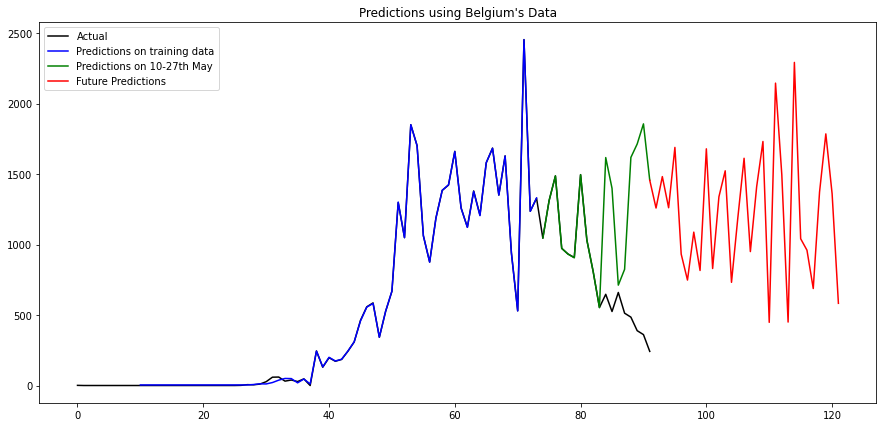

Prediction for  Canada :
Epoch: 0 Loss: tensor(0.0978)
Epoch: 400 Loss: tensor(4.2900e-05)
Epoch: 800 Loss: tensor(9.8174e-05)
Epoch: 1200 Loss: tensor(1.4306e-05)
Epoch: 1500 Loss: tensor(4.9451e-05)
Each day prediction from 28May to 27June for Canada: [1082  970 1634  473 1454 1497 1066 2477 1696 1237 2669 1869  799 3677
 1643 1376 2199 1893 1228 1673  677 1369 1368 1360 2014 1703 2078 1606
 2287 1617 1964]


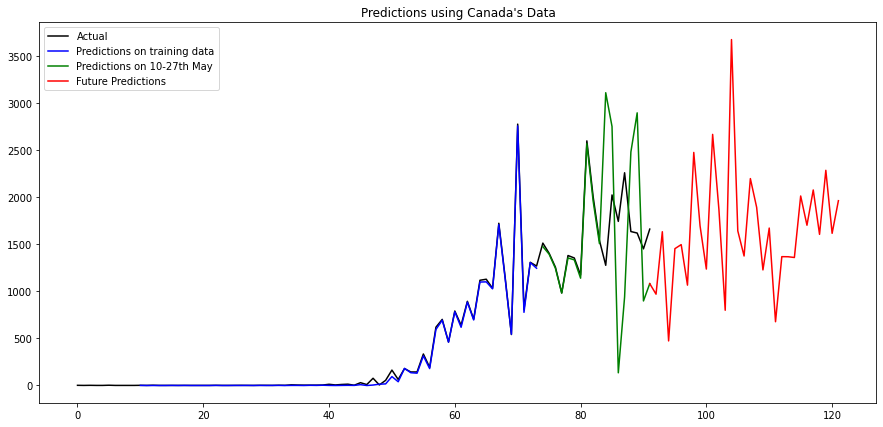

Prediction for  Romania :
Epoch: 0 Loss: tensor(0.2784)
Epoch: 400 Loss: tensor(0.0009)
Epoch: 800 Loss: tensor(0.0002)
Epoch: 1200 Loss: tensor(2.5684e-05)
Epoch: 1500 Loss: tensor(4.1018e-05)
Each day prediction from 28May to 27June for Romania: [199 142 288 359 347 265 237 311 404 456 295 248 304 305 403 312 192 231
 247 235 301 242 169 178 219 228 325 295 150 313 239]


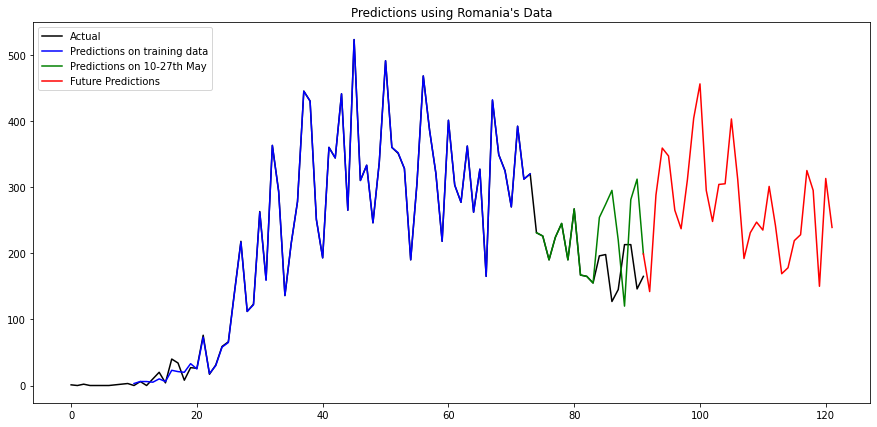

Prediction for  Israel :
Epoch: 0 Loss: tensor(0.0972)
Epoch: 400 Loss: tensor(3.4036e-05)
Epoch: 800 Loss: tensor(9.8112e-06)
Epoch: 1200 Loss: tensor(0.0002)
Epoch: 1500 Loss: tensor(0.0001)
Each day prediction from 28May to 27June for Israel: [ 18  20  22  26  30  36  42  52  65  82 105 136 165 179 164 379 799 607
 546 609 857 523 598 351 783 499 458 272 560 526 511]


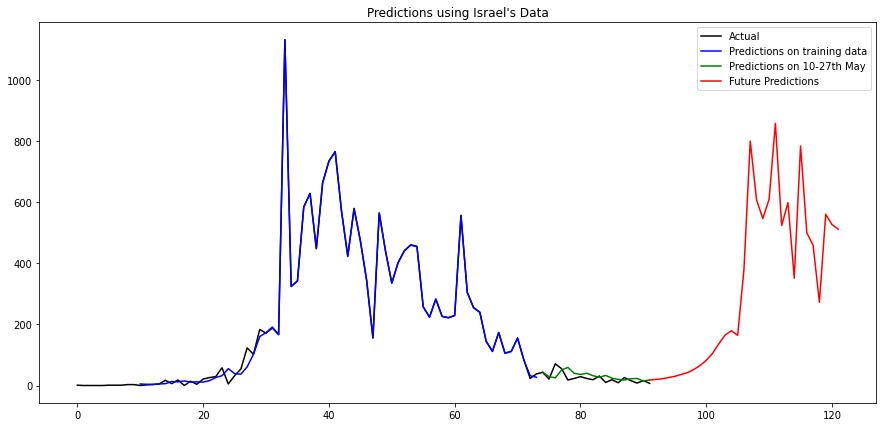

Prediction for  Russia :
Epoch: 0 Loss: tensor(0.0614)
Epoch: 400 Loss: tensor(7.7610e-05)
Epoch: 800 Loss: tensor(6.5713e-05)
Epoch: 1200 Loss: tensor(4.7045e-05)
Epoch: 1500 Loss: tensor(6.5565e-05)
Each day prediction from 28May to 27June for Russia: [1837 3919 1893 2086 1082 2421  775 4010 1166 2913 3102 3090 2733 5265
 4489 3819 7261 3326 4870 5454 2115 2067 4689 1143 4103  869 1847 3102
 1329 1269 4788]


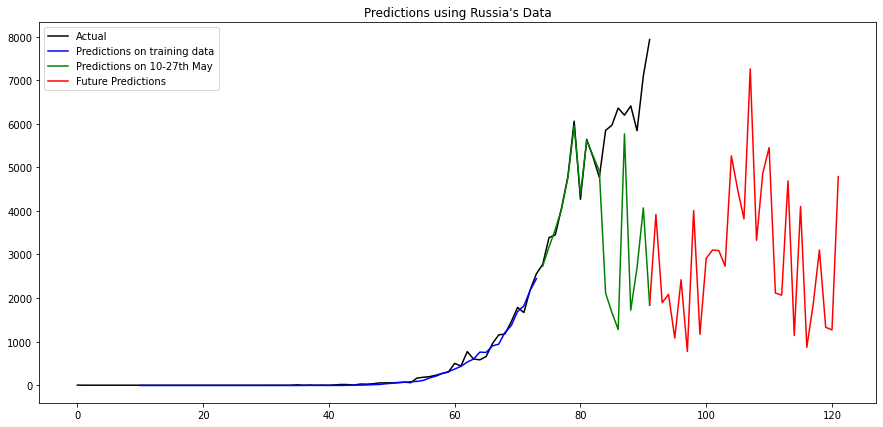

In [95]:
for country in df.columns[1:]:
  mainMethod(country,d[country], 31)


# Predicion for Pakistan

Prediction for  Pakistan :
Epoch: 0 Loss: tensor(0.1013)
Epoch: 400 Loss: tensor(0.0002)
Epoch: 800 Loss: tensor(4.7683e-05)
Epoch: 1200 Loss: tensor(4.7657e-05)
Epoch: 1500 Loss: tensor(3.2315e-05)
Each day prediction from 28May to 27June for Pakistan: [1962 1078 1710 1396 1887 1178 2158 1432 1544 2515  944 2062 1648 2009
  661 2284  898 1185 2271 1004 1900 1713 2244  124 2796  911  421 2618
  503 1585 1723]


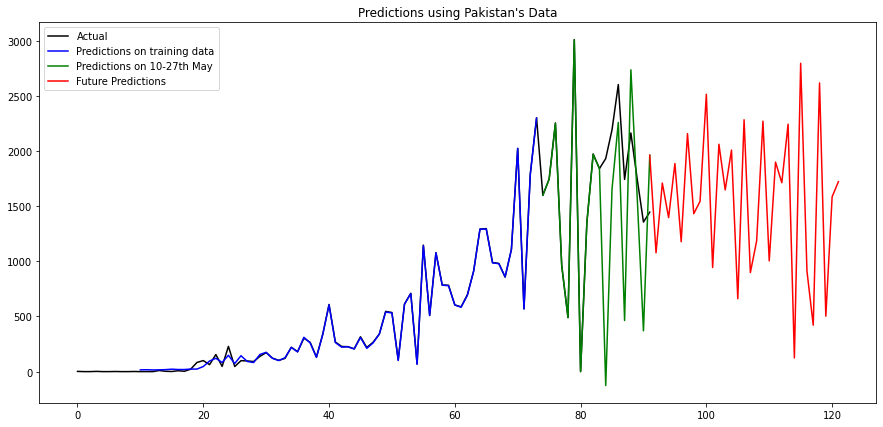

In [96]:
mainMethod('Pakistan',d["Pakistan"], 31)